In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ca11-03homes.xls', index_col = 'Obs')

In [ ]:
df

,Price,SqFt,BedRooms,Baths,Garage,Zip
Obs,,,,,,
1,52900,932,1,1.0,0,4
2,61500,780,3,1.0,0,5
3,62000,1500,3,1.0,0,9
4,62900,760,2,1.0,0,4
5,64900,900,2,1.0,0,4
...,...,...,...,...,...,...
500,490000,3900,4,3.5,3,5
501,535000,3331,5,3.5,3,6
502,549000,3615,4,4.5,3,5


In [ ]:
df.isnull().sum()

Price       0
SqFt        0
BedRooms    0
Baths       0
Garage      0
Zip         0
dtype: int64

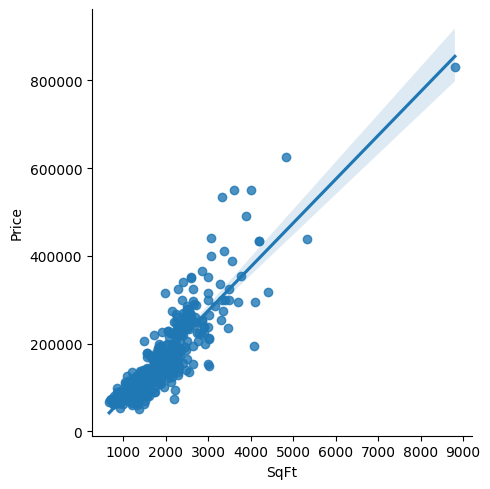

In [ ]:
import seaborn as sns
sns.lmplot(x = 'SqFt', y = 'Price', data = df)


<Axes: xlabel='BedRooms', ylabel='Price'>

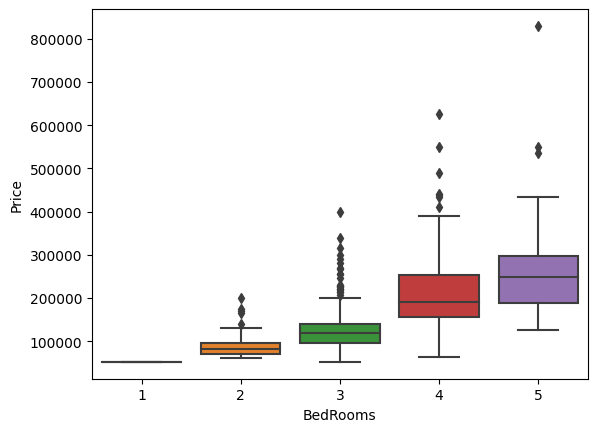

In [ ]:
sns.boxplot(x = 'BedRooms', y = 'Price', data = df)



<Axes: xlabel='Baths', ylabel='Price'>

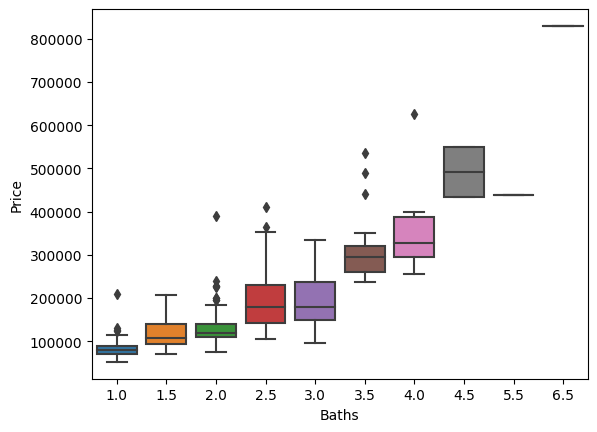

In [ ]:
sns.boxplot(x = 'Baths', y = 'Price', data = df)

In [ ]:
q3 = df['Price'].quantile(0.75) #third quantile
q3

184900.0

In [ ]:
q1 = df['Price'].quantile(0.25)
q1

104900.0

In [ ]:
iqr = q3 - q1
iqr

80000.0

In [ ]:
ul = q3 + (1.5 * iqr)
ll = q1 - (1.5 * iqr)

In [ ]:
print(ul, ll)

304900.0 -15100.0


In [ ]:
import numpy as np

In [ ]:
upper = np.where(df['Price'] >= ul)

In [ ]:
lower = np.where(df['Price'] <= ll)

In [ ]:
upper

(array([444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 488, 489, 490,
        491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503]),)

In [ ]:
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

In [ ]:
df.tail(10)

,Price,SqFt,BedRooms,Baths,Garage,Zip
Obs,,,,,,
479,264900,2586,4,2.5,3,9
480,264900,3016,4,2.5,3,5
481,269500,2407,3,2.5,3,5
482,274900,2161,4,3.5,3,5
483,285000,3162,5,3.0,3,6
484,285000,2510,4,2.5,3,5
485,294900,4105,5,3.5,3,5
486,295000,3714,4,4.0,3,5
487,299000,3492,4,4.0,3,9


In [ ]:
x = df.iloc[:, 1:4].values

In [ ]:
x

array([[9.320e+02, 1.000e+00, 1.000e+00],
       [7.800e+02, 3.000e+00, 1.000e+00],
       [1.500e+03, 3.000e+00, 1.000e+00],
       ...,
       [3.714e+03, 4.000e+00, 4.000e+00],
       [3.492e+03, 4.000e+00, 4.000e+00],
       [8.805e+03, 5.000e+00, 6.500e+00]])

In [ ]:
y = df.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
y_pred


array([ 64136.23569481, 107316.74649989, 192170.84379252, 174797.55038435,
       107686.92696736, 341717.56197964, 109381.02296848, 179313.75208745,
       113979.9949143 , 167772.85565171, 171910.14273811, 146424.25827794,
       165221.70576094, 124484.38604113,  80942.4289178 , 231033.60220705,
       130350.70572556, 148209.85867101, 285598.20311166, 136931.18389724,
       225495.82001376, 173991.88750516, 173085.98608478, 100505.4258985 ,
       114424.21147526,  73612.85566196, 121770.23914465,  77536.76861711,
       173234.05827177, 160360.51215315, 172354.35929907,  95601.57542949,
       151510.10364595, 170560.02475678,  64062.19960131, 180942.5461443 ,
       166266.94521907, 273166.33007427, 100579.461992  , 192344.10454228,
       190567.23829844, 121531.67645062,  62655.51382494, 150553.82510002,
       117237.58302801,  65221.58853443, 292128.3041578 , 119088.48536534,
       196490.12577791, 227898.89771756, 156624.78476648, 105522.4119576 ,
       199451.56951765, 1

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.8066409352317221

In [ ]:
print(reg.predict([[780, 3, 1]]))

[51920.2802684]
